<a href="https://colab.research.google.com/github/Sercan1111/Chess/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import pandas as pd

# Function to parse the FEN notation and convert it into a list of integers
def parse_fen(fen):
    # Remove the '/' and replace numbers with the corresponding number of empty spaces
    fen = fen.replace('/', '')
    for i in range(1, 9):
        fen = fen.replace(str(i), '*' * i)

    # Map chess pieces to integers as described in the assignment
    piece_map = 'kqrbnp*PNBRQK'
    codes = list(map(lambda x: piece_map.index(x) - 6, fen))

    return codes

# Function to count the number of black and white pieces
def count_pieces(board_state):
    # Positive values represent white pieces, negative values represent black pieces
    black_count = sum(1 for piece in board_state if piece < 0)
    white_count = sum(1 for piece in board_state if piece > 0)

    return black_count, white_count

# Function to load and preprocess dataset from .txt files
def load_and_preprocess_data(file_name):
    data = []
    with open(file_name, 'r') as f:
        for line in f:
            # Split each line by spaces: FEN string, side to move, and advantage
            parts = line.strip().split()
            fen = parts[0]  # FEN notation (board state)
            side_to_move = parts[1]  # 'w' or 'b'
            advantage = parts[2]  # 'w' or 'b'

            # Parse the FEN string into numerical representation
            board_state = parse_fen(fen)

            # Count the number of pieces for black and white
            black_count, white_count = count_pieces(board_state)

            # Append the parsed data: board state, side to move, advantage, black/white piece count
            data.append(board_state + [side_to_move, advantage, black_count, white_count])

    # Create a DataFrame for easier manipulation
    columns = [f'square_{i}' for i in range(64)] + ['side_to_move', 'advantage', 'black_piece_count', 'white_piece_count']
    df = pd.DataFrame(data, columns=columns)

    return df
# Update paths with your specific Google Drive folder
train_path = '/content/drive/MyDrive/Colab_Notebooks/Chess_train.txt'
test_path = '/content/drive/MyDrive/Colab_Notebooks/Chess_test.txt'
val_path = '/content/drive/MyDrive/Colab_Notebooks/Chess_validation.txt'

# Load and preprocess train, test, and validation datasets
train_df = load_and_preprocess_data(train_path)
test_df = load_and_preprocess_data(test_path)
val_df = load_and_preprocess_data(val_path)

# Save the preprocessed datasets to CSV
train_df.to_csv('/content/drive/MyDrive/Colab_Notebooks/Chess_train.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Colab_Notebooks/Chess_test.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/Colab_Notebooks/Chess_validation.csv', index=False)

# Display the first few rows of the train dataset to verify
test_df.head(10)


,square_0,square_1,square_2,square_3,square_4,square_5,square_6,square_7,square_8,square_9,...,square_58,square_59,square_60,square_61,square_62,square_63,side_to_move,advantage,black_piece_count,white_piece_count
0,0,0,0,0,-4,-4,-6,0,0,-1,...,0,0,0,6,0,4,w,b,12,10
1,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,b,b,7,6
2,0,0,0,0,0,-4,-6,0,0,-1,...,0,4,4,0,6,0,b,w,13,14
3,0,0,0,0,0,0,-6,0,0,0,...,0,4,0,0,0,0,w,b,9,9
4,-4,0,0,-4,0,0,-6,0,-1,0,...,4,0,0,4,6,0,w,w,12,12
5,0,0,0,0,-6,-4,0,0,0,-1,...,0,0,0,6,0,0,w,w,7,7
6,0,0,0,0,0,-6,0,0,0,0,...,0,0,0,0,0,0,w,b,8,6
7,0,0,-6,-4,0,-3,-3,0,0,-5,...,0,0,0,0,0,0,w,w,16,16
8,0,0,0,0,0,-3,0,0,-1,0,...,4,5,0,6,0,0,w,w,9,9
9,-4,-2,-5,0,-6,0,0,-4,0,-1,...,3,5,2,4,6,0,w,w,16,16


<Figure size 800x600 with 0 Axes>

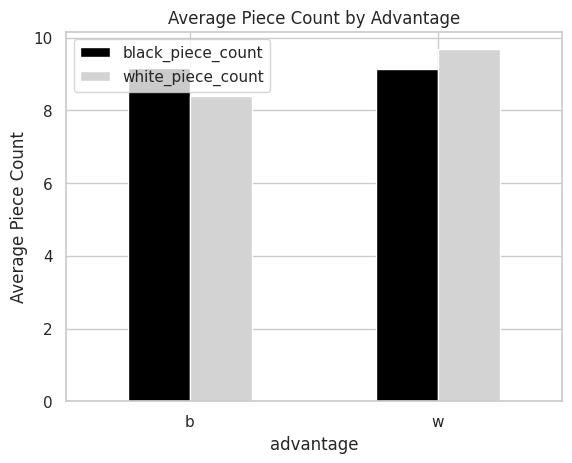

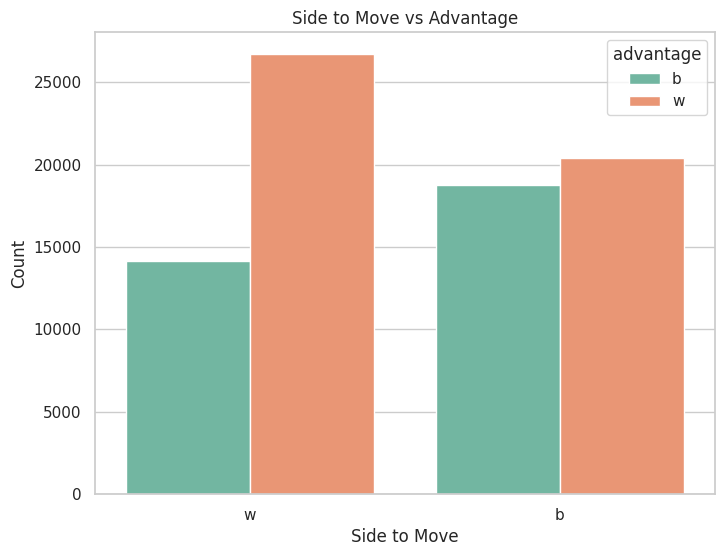

<ipython-input-35-57eaa551d301>:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  queen_positions = train_df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 5 or x == -5 else 0)
<ipython-input-35-57eaa551d301>:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  king_positions = train_df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 6 or x == -6 else 0)


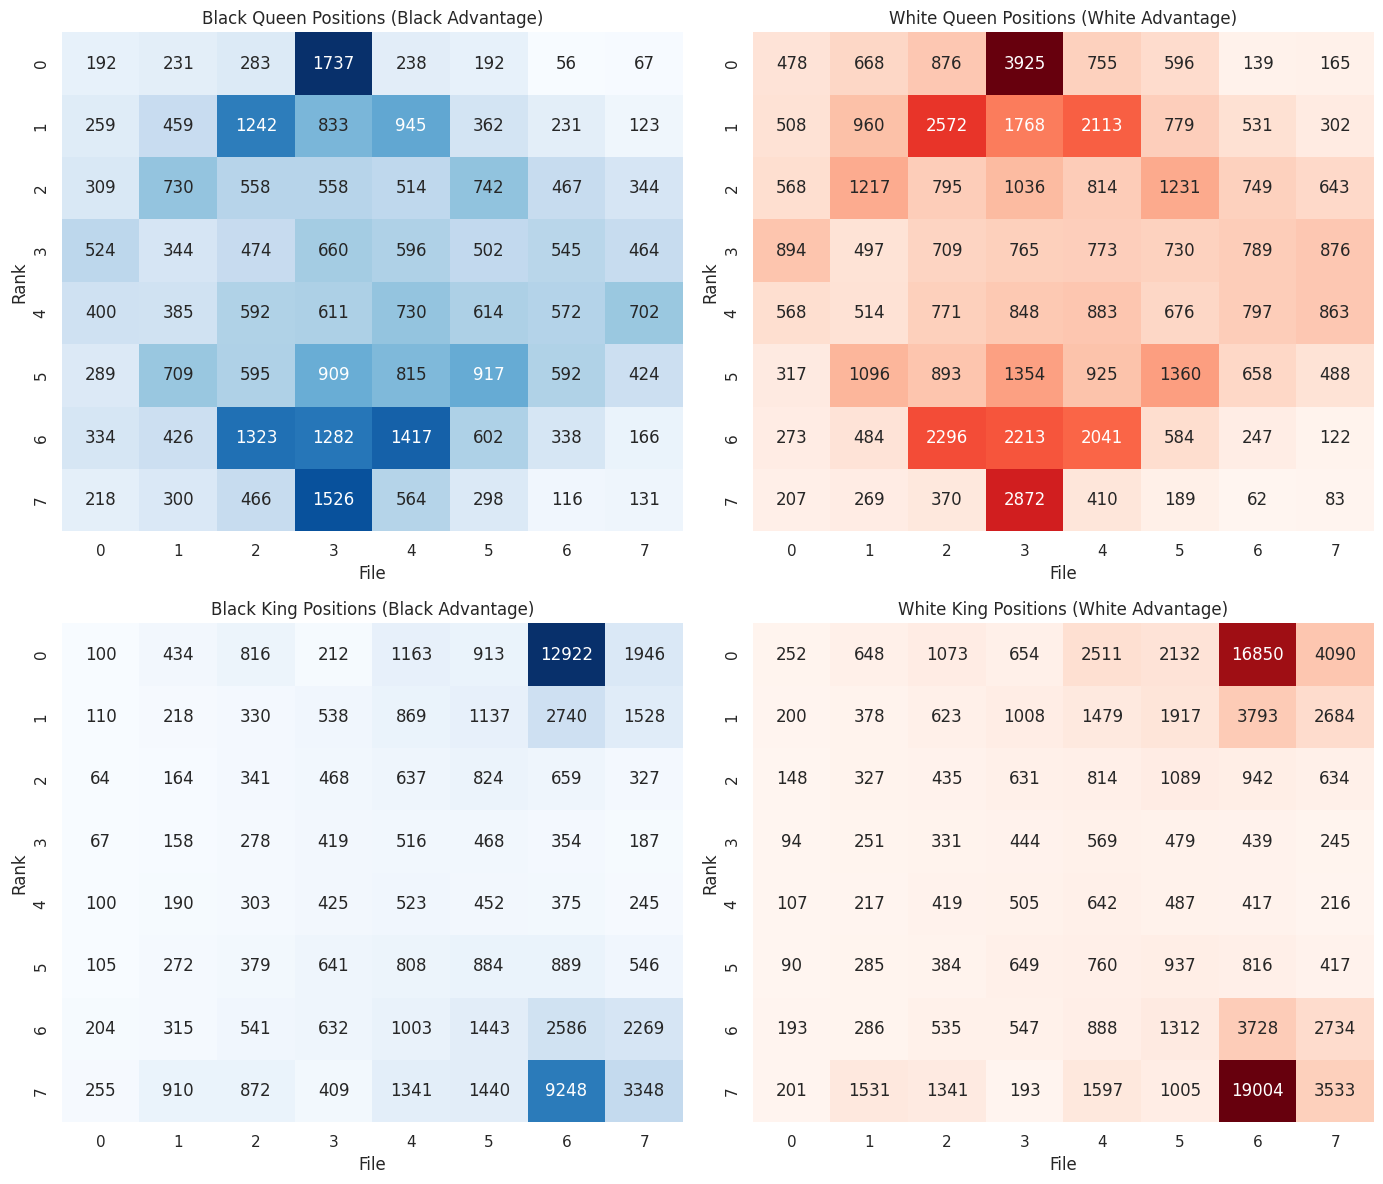

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style='whitegrid')

# 1. Piece Value Analysis: Bar plot for average piece count in winning situations

# Group by advantage and calculate the mean piece count for black and white
piece_count_avg = train_df.groupby('advantage')[['black_piece_count', 'white_piece_count']].mean()

# Plotting
plt.figure(figsize=(8, 6))
piece_count_avg.plot(kind='bar', color=['black', 'lightgray'])
plt.title('Average Piece Count by Advantage')
plt.ylabel('Average Piece Count')
plt.xticks(rotation=0)
plt.show()

# 2. Side to Move Analysis: Count plot of side to move vs. advantage

plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='side_to_move', hue='advantage', palette='Set2')
plt.title('Side to Move vs Advantage')
plt.xlabel('Side to Move')
plt.ylabel('Count')
plt.show()

# 3. Position Influence: Heatmap of piece positions (queens and kings)

# Focus on squares occupied by black and white queens and kings
queen_positions = train_df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 5 or x == -5 else 0)
king_positions = train_df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 6 or x == -6 else 0)

# Reshape the positions into a 8x8 grid for heatmap
black_queen_positions = queen_positions[train_df['advantage'] == 'b'].sum().values.reshape(8, 8)
white_queen_positions = queen_positions[train_df['advantage'] == 'w'].sum().values.reshape(8, 8)
black_king_positions = king_positions[train_df['advantage'] == 'b'].sum().values.reshape(8, 8)
white_king_positions = king_positions[train_df['advantage'] == 'w'].sum().values.reshape(8, 8)

# Plot heatmaps for queen and king positions for each side's advantage
plt.figure(figsize=(14, 12))

# Black Queen Positions
plt.subplot(2, 2, 1)
sns.heatmap(black_queen_positions, cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Black Queen Positions (Black Advantage)')
plt.xlabel('File')
plt.ylabel('Rank')

# White Queen Positions
plt.subplot(2, 2, 2)
sns.heatmap(white_queen_positions, cmap='Reds', annot=True, fmt='d', cbar=False)
plt.title('White Queen Positions (White Advantage)')
plt.xlabel('File')
plt.ylabel('Rank')

# Black King Positions
plt.subplot(2, 2, 3)
sns.heatmap(black_king_positions, cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Black King Positions (Black Advantage)')
plt.xlabel('File')
plt.ylabel('Rank')

# White King Positions
plt.subplot(2, 2, 4)
sns.heatmap(white_king_positions, cmap='Reds', annot=True, fmt='d', cbar=False)
plt.title('White King Positions (White Advantage)')
plt.xlabel('File')
plt.ylabel('Rank')

plt.tight_layout()
plt.show()


In [36]:
train_df.head()

,square_0,square_1,square_2,square_3,square_4,square_5,square_6,square_7,square_8,square_9,...,square_58,square_59,square_60,square_61,square_62,square_63,side_to_move,advantage,black_piece_count,white_piece_count
0,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,w,b,3,3
1,0,-4,0,0,0,0,-6,0,0,-4,...,0,2,2,0,0,0,w,b,12,12
2,-4,0,0,0,0,-6,0,0,0,-1,...,0,0,0,0,0,0,w,w,9,11
3,0,0,-3,0,-4,0,-6,0,0,0,...,0,4,0,0,6,0,w,w,9,10
4,0,0,0,0,-4,-4,0,0,-1,-1,...,0,0,0,0,6,0,b,w,9,10


<ipython-input-37-156801a7b5df>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  king_positions = df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 6 or x == -6 else 0)


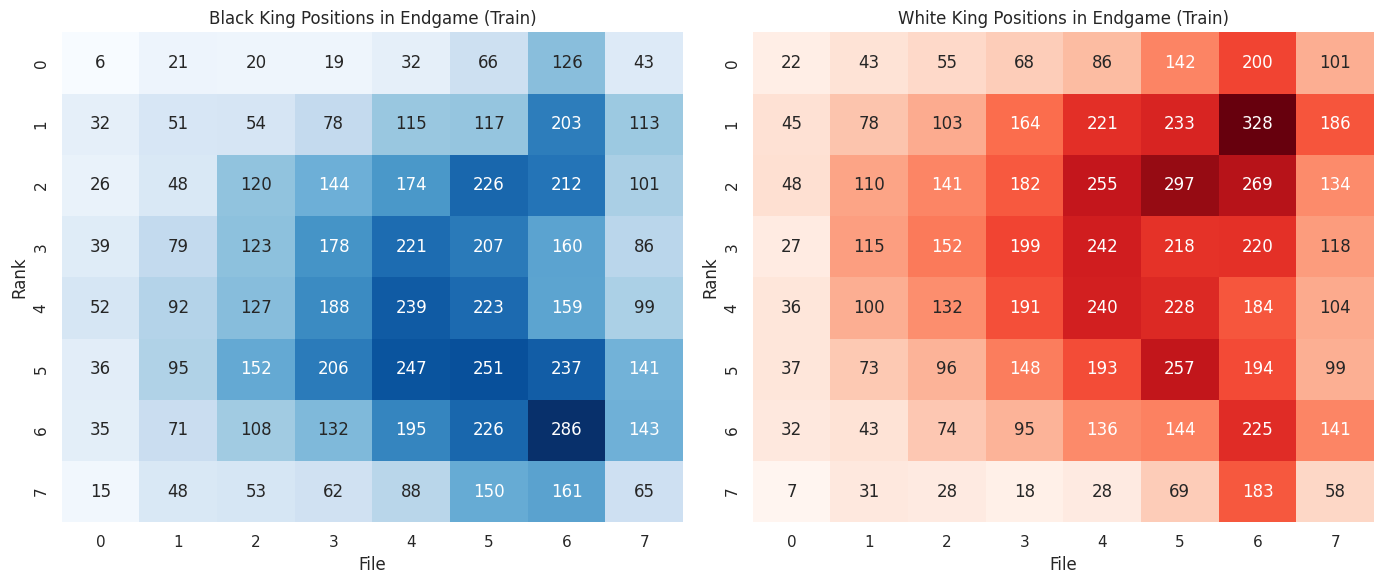

<ipython-input-37-156801a7b5df>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  king_positions = df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 6 or x == -6 else 0)


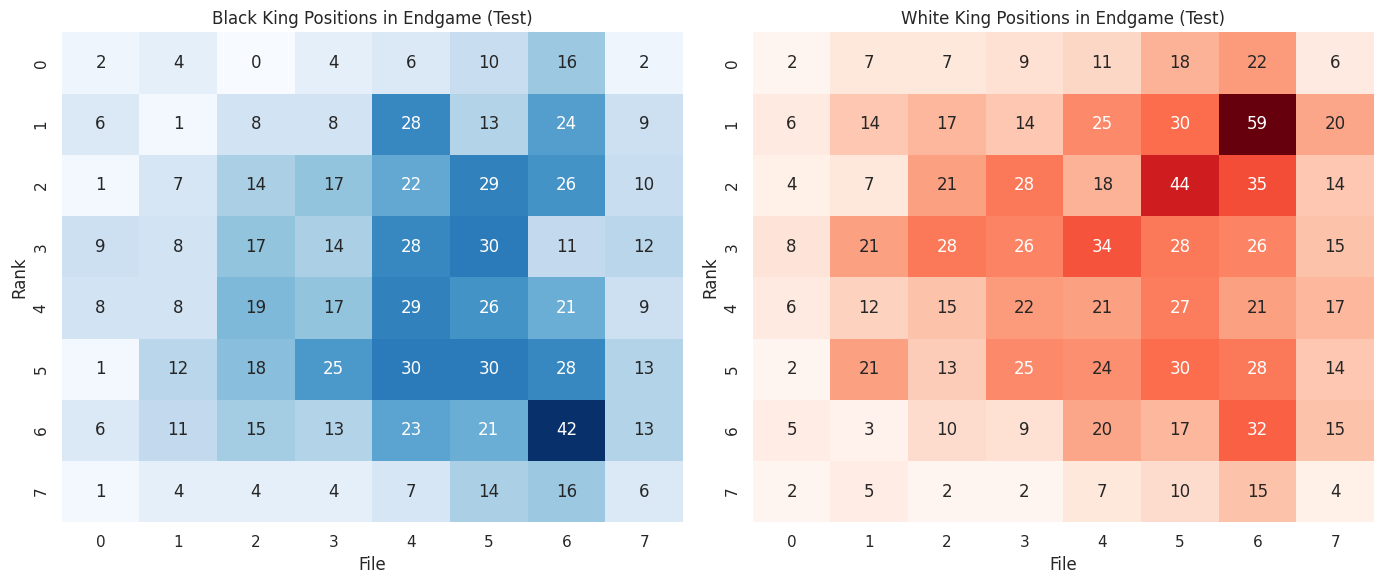

<ipython-input-37-156801a7b5df>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  king_positions = df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 6 or x == -6 else 0)


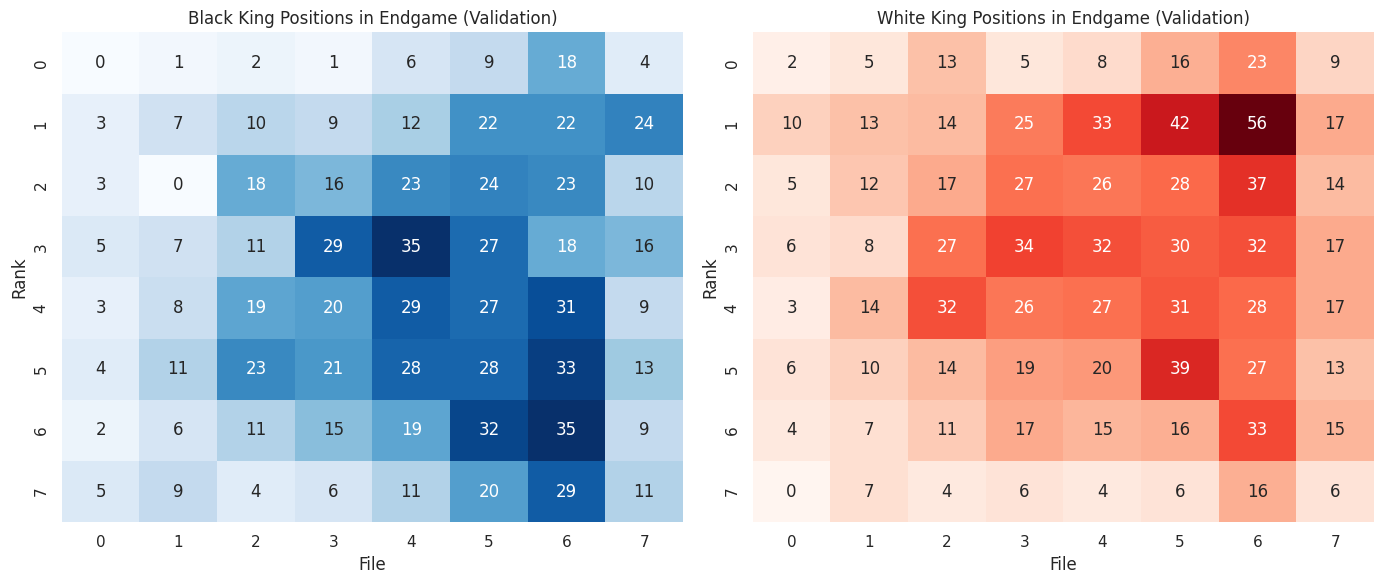

Streaming output truncated to the last 5000 lines.
<ipython-input-37-156801a7b5df>:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return board_state[60] == 0 and (board_state[62] == 6 or board_state[63] == 6)
<ipython-input-37-156801a7b5df>:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return board_state[4] == 0 and (board_state[6] == -6 or board_state[7] == -6)
<ipython-input-37-156801a7b5df>:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

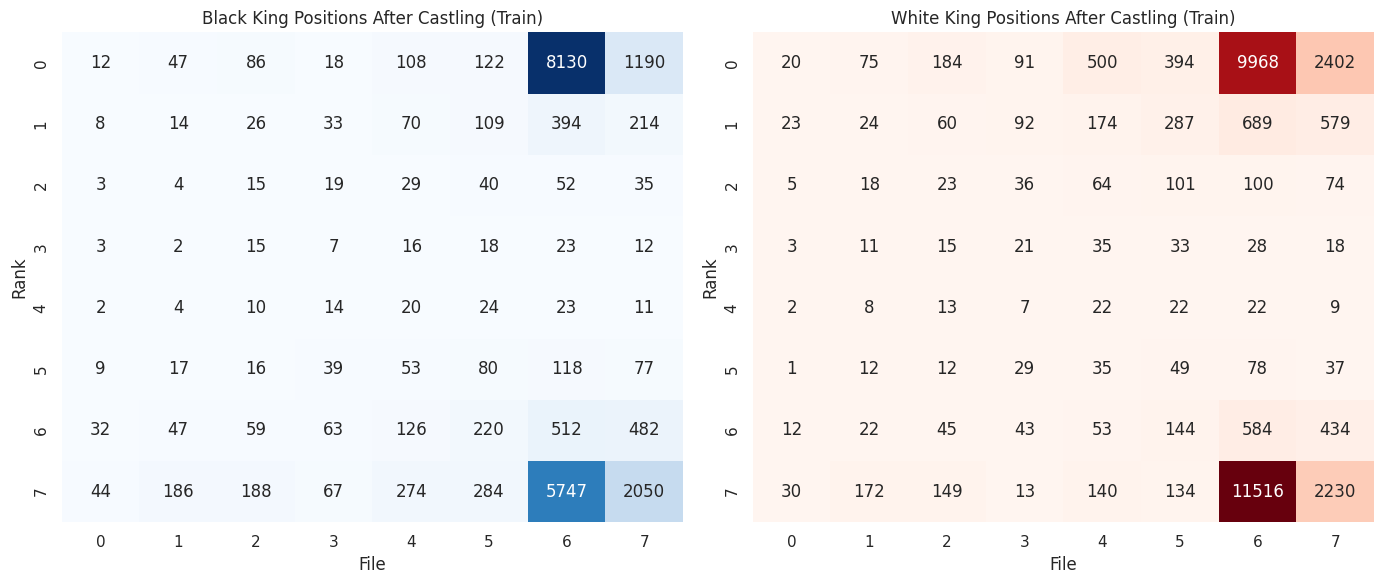

<ipython-input-37-156801a7b5df>:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  king_positions_castled = df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 6 or x == -6 else 0)


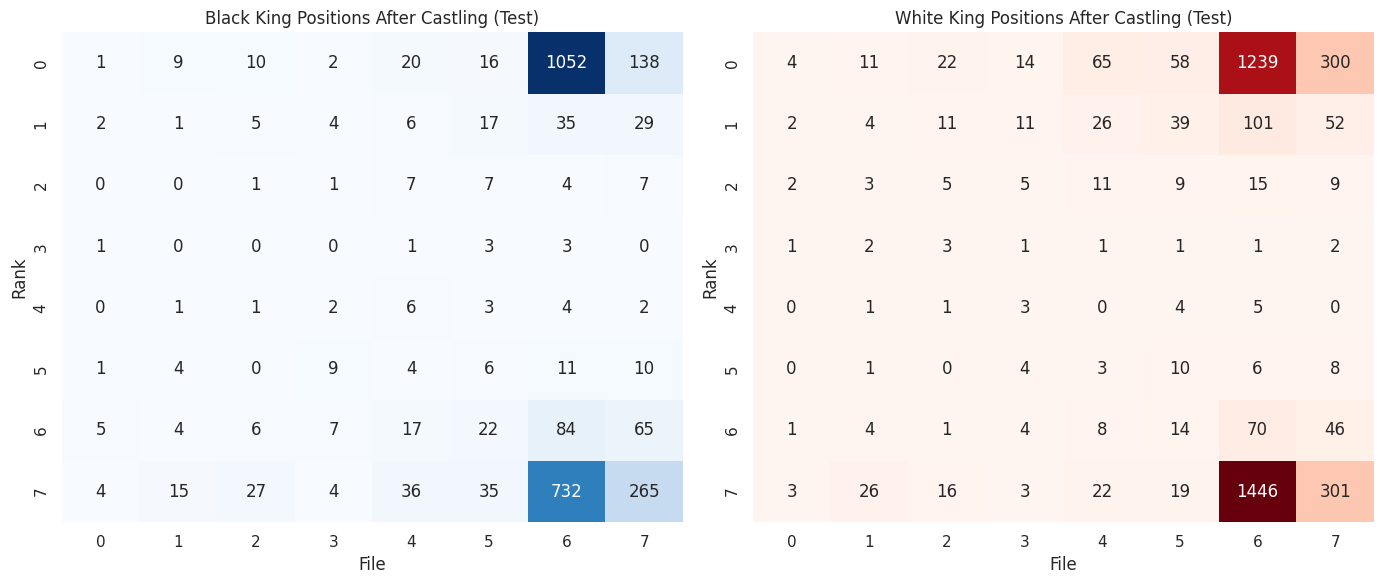

<ipython-input-37-156801a7b5df>:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  king_positions_castled = df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 6 or x == -6 else 0)


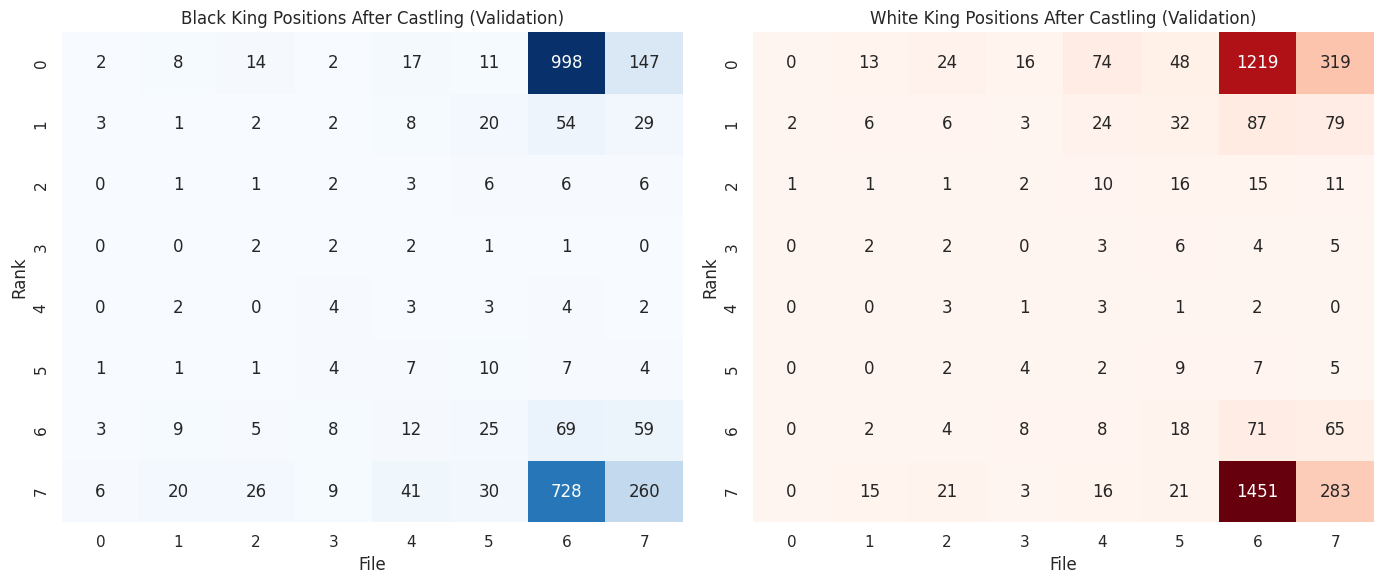

In [37]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Filter positions by piece count

def filter_by_piece_count(df, max_pieces=10):
    # Piece count is the sum of the absolute values of the pieces (ignore 0 for empty squares)
    df['total_piece_count'] = df[[f'square_{i}' for i in range(64)]].apply(lambda x: np.sum(np.abs(x) > 0), axis=1)
    return df[df['total_piece_count'] <= max_pieces]

# Apply filtering to all datasets
endgame_train_df = filter_by_piece_count(train_df, max_pieces=10)
endgame_test_df = filter_by_piece_count(test_df, max_pieces=10)
endgame_val_df = filter_by_piece_count(val_df, max_pieces=10)

# Check if the king activity increases in these endgame situations
# Let's repeat the heatmap generation for the kings in these endgame positions

def plot_king_positions(df, title_suffix):
    king_positions = df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 6 or x == -6 else 0)

    # Reshape the positions into a 8x8 grid for heatmap
    black_king_positions = king_positions[df['advantage'] == 'b'].sum().values.reshape(8, 8)
    white_king_positions = king_positions[df['advantage'] == 'w'].sum().values.reshape(8, 8)

    # Plot heatmaps for king positions in endgame positions
    plt.figure(figsize=(14, 6))

    # Black King Positions (Endgame)
    plt.subplot(1, 2, 1)
    sns.heatmap(black_king_positions, cmap='Blues', annot=True, fmt='d', cbar=False)
    plt.title(f'Black King Positions in Endgame {title_suffix}')
    plt.xlabel('File')
    plt.ylabel('Rank')

    # White King Positions (Endgame)
    plt.subplot(1, 2, 2)
    sns.heatmap(white_king_positions, cmap='Reds', annot=True, fmt='d', cbar=False)
    plt.title(f'White King Positions in Endgame {title_suffix}')
    plt.xlabel('File')
    plt.ylabel('Rank')

    plt.tight_layout()
    plt.show()

# Plot king positions for endgame data
plot_king_positions(endgame_train_df, '(Train)')
plot_king_positions(endgame_test_df, '(Test)')
plot_king_positions(endgame_val_df, '(Validation)')

# 2. Check Castling Behavior

def check_castling(df):
    # Castling occurs when the king moves from its original square (file 4) to the right side (file 6 or 7)
    def has_castled(board_state, side):
        if side == 'w':
            # White castling (king moves from square 60 to square 62 or 63)
            return board_state[60] == 0 and (board_state[62] == 6 or board_state[63] == 6)
        elif side == 'b':
            # Black castling (king moves from square 4 to square 6 or 7)
            return board_state[4] == 0 and (board_state[6] == -6 or board_state[7] == -6)
        return False

    # Apply castling detection
    df['has_castled'] = df.apply(lambda row: has_castled(row[[f'square_{i}' for i in range(64)]], row['side_to_move']), axis=1)

    # Return only the rows where castling has occurred
    return df[df['has_castled']]

# Apply castling detection to all datasets
castled_train_df = check_castling(train_df)
castled_test_df = check_castling(test_df)
castled_val_df = check_castling(val_df)

# Analyze the kings' positions after castling
def plot_castled_king_positions(df, title_suffix):
    king_positions_castled = df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 6 or x == -6 else 0)

    # Reshape the positions into a 8x8 grid for heatmap
    black_king_positions_castled = king_positions_castled[df['advantage'] == 'b'].sum().values.reshape(8, 8)
    white_king_positions_castled = king_positions_castled[df['advantage'] == 'w'].sum().values.reshape(8, 8)

    # Plot heatmaps for king positions after castling
    plt.figure(figsize=(14, 6))

    # Black King Positions (After Castling)
    plt.subplot(1, 2, 1)
    sns.heatmap(black_king_positions_castled, cmap='Blues', annot=True, fmt='d', cbar=False)
    plt.title(f'Black King Positions After Castling {title_suffix}')
    plt.xlabel('File')
    plt.ylabel('Rank')

    # White King Positions (After Castling)
    plt.subplot(1, 2, 2)
    sns.heatmap(white_king_positions_castled, cmap='Reds', annot=True, fmt='d', cbar=False)
    plt.title(f'White King Positions After Castling {title_suffix}')
    plt.xlabel('File')
    plt.ylabel('Rank')

    plt.tight_layout()
    plt.show()

# Plot castled king positions for all datasets
plot_castled_king_positions(castled_train_df, '(Train)')
plot_castled_king_positions(castled_test_df, '(Test)')
plot_castled_king_positions(castled_val_df, '(Validation)')


In [38]:
test_df.head()

,square_0,square_1,square_2,square_3,square_4,square_5,square_6,square_7,square_8,square_9,...,square_60,square_61,square_62,square_63,side_to_move,advantage,black_piece_count,white_piece_count,total_piece_count,has_castled
0,0,0,0,0,-4,-4,-6,0,0,-1,...,0,6,0,4,w,b,12,10,22,False
1,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,b,b,7,6,13,False
2,0,0,0,0,0,-4,-6,0,0,-1,...,4,0,6,0,b,w,13,14,27,True
3,0,0,0,0,0,0,-6,0,0,0,...,0,0,0,0,w,b,9,9,18,False
4,-4,0,0,-4,0,0,-6,0,-1,0,...,0,4,6,0,w,w,12,12,24,True


<ipython-input-39-f1fa3f7d7f4e>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rook_positions = train_df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 4 or x == -4 else 0)
<ipython-input-39-f1fa3f7d7f4e>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bishop_positions = train_df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 3 or x == -3 else 0)


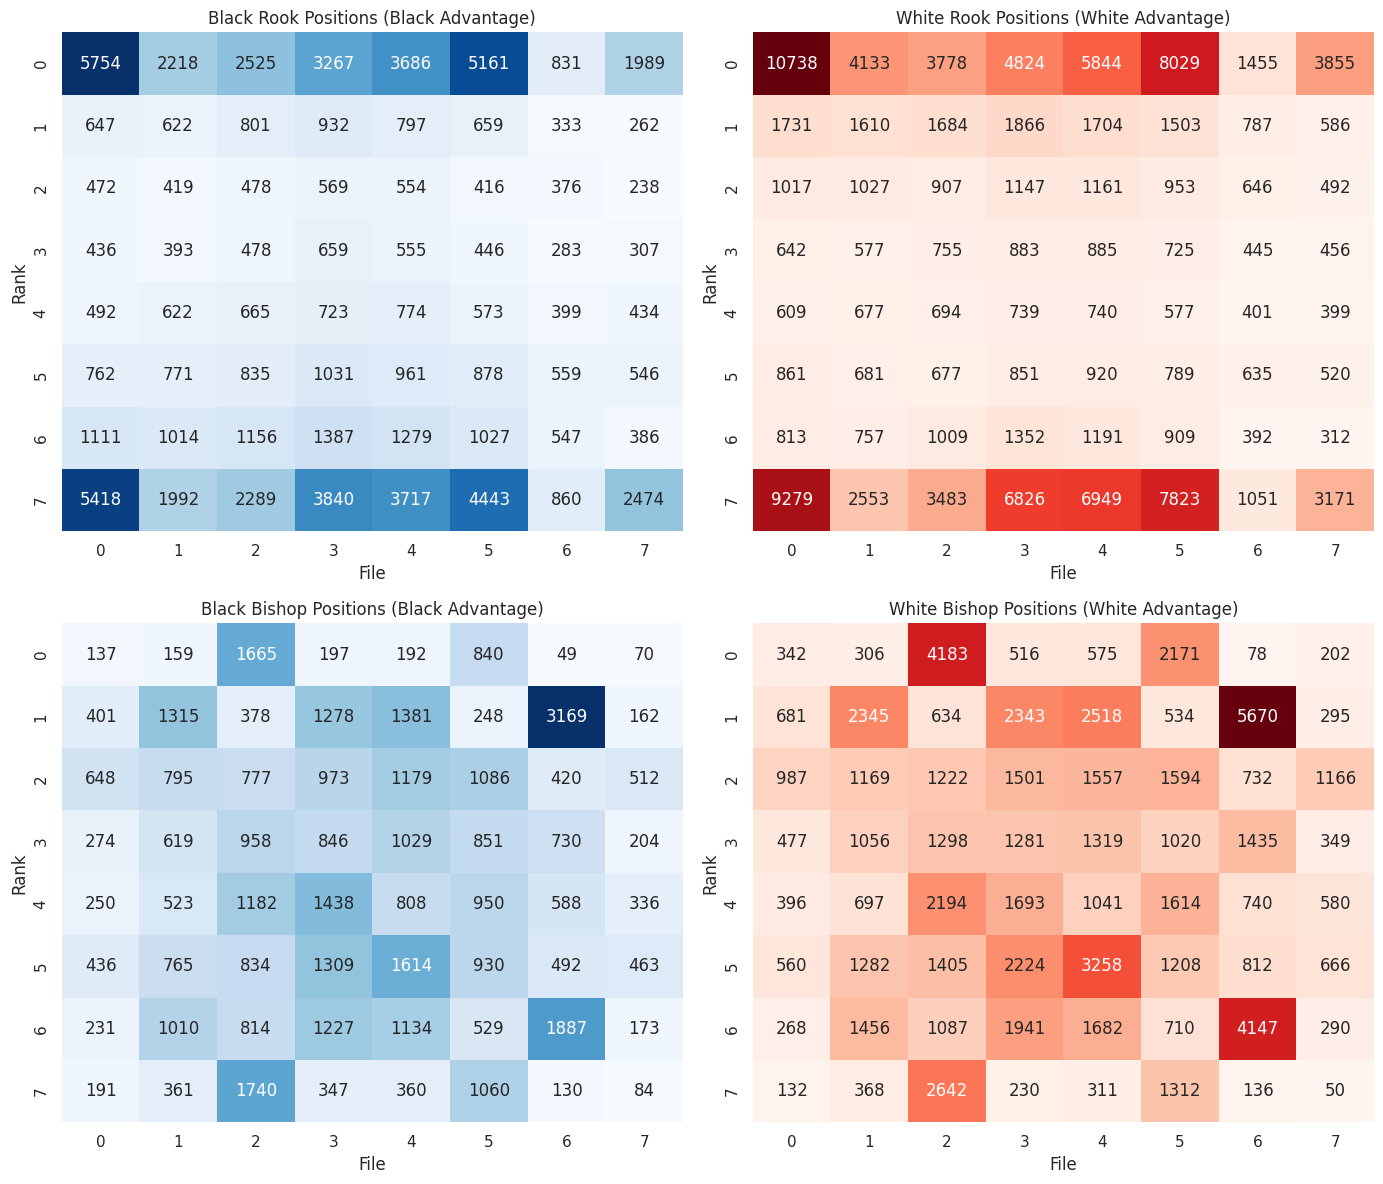

In [39]:
# 3. Position Influence: Heatmap of piece positions (rooks and bishops)

# Focus on squares occupied by black and white rooks and bishops
rook_positions = train_df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 4 or x == -4 else 0)
bishop_positions = train_df[[f'square_{i}' for i in range(64)]].applymap(lambda x: 1 if x == 3 or x == -3 else 0)

# Reshape the positions into a 8x8 grid for heatmap
black_rook_positions = rook_positions[train_df['advantage'] == 'b'].sum().values.reshape(8, 8)
white_rook_positions = rook_positions[train_df['advantage'] == 'w'].sum().values.reshape(8, 8)
black_bishop_positions = bishop_positions[train_df['advantage'] == 'b'].sum().values.reshape(8, 8)
white_bishop_positions = bishop_positions[train_df['advantage'] == 'w'].sum().values.reshape(8, 8)

# Plot heatmaps for rooks and bishops positions for each side's advantage
plt.figure(figsize=(14, 12))

# Black Rook Positions
plt.subplot(2, 2, 1)
sns.heatmap(black_rook_positions, cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Black Rook Positions (Black Advantage)')
plt.xlabel('File')
plt.ylabel('Rank')

# White Rook Positions
plt.subplot(2, 2, 2)
sns.heatmap(white_rook_positions, cmap='Reds', annot=True, fmt='d', cbar=False)
plt.title('White Rook Positions (White Advantage)')
plt.xlabel('File')
plt.ylabel('Rank')

# Black Bishop Positions
plt.subplot(2, 2, 3)
sns.heatmap(black_bishop_positions, cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Black Bishop Positions (Black Advantage)')
plt.xlabel('File')
plt.ylabel('Rank')

# White Bishop Positions
plt.subplot(2, 2, 4)
sns.heatmap(white_bishop_positions, cmap='Reds', annot=True, fmt='d', cbar=False)
plt.title('White Bishop Positions (White Advantage)')
plt.xlabel('File')
plt.ylabel('Rank')

plt.tight_layout()
plt.show()


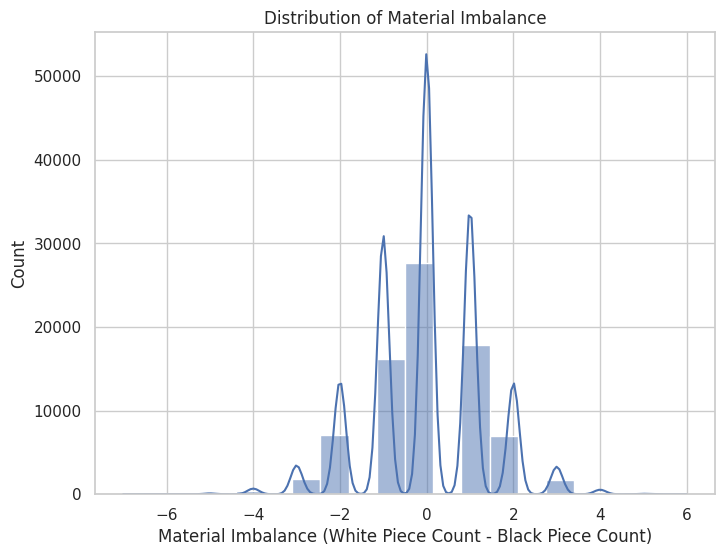

In [40]:
# Adding Material Imbalance Feature
train_df['material_imbalance'] = train_df['white_piece_count'] - train_df['black_piece_count']
test_df['material_imbalance'] = test_df['white_piece_count'] - test_df['black_piece_count']
val_df['material_imbalance'] = val_df['white_piece_count'] - val_df['black_piece_count']

# Visualize material imbalance distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_df['material_imbalance'], bins=20, kde=True)
plt.title('Distribution of Material Imbalance')
plt.xlabel('Material Imbalance (White Piece Count - Black Piece Count)')
plt.ylabel('Count')
plt.show()

# Simple Model: Predict advantage based on material imbalance


In [41]:
val_df.head()

,square_0,square_1,square_2,square_3,square_4,square_5,square_6,square_7,square_8,square_9,...,square_61,square_62,square_63,side_to_move,advantage,black_piece_count,white_piece_count,total_piece_count,has_castled,material_imbalance
0,0,0,0,0,0,0,0,0,0,0,...,4,0,6,w,w,2,5,7,True,3
1,0,0,0,0,0,0,0,0,0,-6,...,0,0,0,b,b,10,9,19,False,-1
2,-4,0,-3,-5,0,-4,0,0,-1,-1,...,0,0,4,b,b,15,14,29,False,-1
3,-4,0,0,0,-4,0,-6,0,0,-1,...,0,0,0,w,w,13,12,25,False,-1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,b,w,3,5,8,False,2


In [42]:
# Function to convert categorical features to numerical and drop the original columns
def convert_categorical_to_numeric(df):
    # Convert 'w' -> 1 and 'b' -> 0 for 'advantage' and 'side_to_move'
    df['advantage_numeric'] = df['advantage'].apply(lambda x: 1 if x == 'w' else 0)
    df['side_to_move_numeric'] = df['side_to_move'].apply(lambda x: 1 if x == 'w' else 0)

    # Convert has_castled True/False to 1/0
    df['has_castled'] = df['has_castled'].astype(int)

    # Drop the old 'advantage' and 'side_to_move' columns
    df = df.drop(['advantage', 'side_to_move'], axis=1)

    return df

# Apply this function to train, test, and validation datasets
train_df = convert_categorical_to_numeric(train_df)
test_df = convert_categorical_to_numeric(test_df)
val_df = convert_categorical_to_numeric(val_df)

# Display the updated datasets
train_df.head()


,square_0,square_1,square_2,square_3,square_4,square_5,square_6,square_7,square_8,square_9,...,square_61,square_62,square_63,black_piece_count,white_piece_count,total_piece_count,has_castled,material_imbalance,advantage_numeric,side_to_move_numeric
0,0,0,0,4,0,0,0,0,0,0,...,0,0,0,3,3,6,0,0,0,1
1,0,-4,0,0,0,0,-6,0,0,-4,...,0,0,0,12,12,24,0,0,0,1
2,-4,0,0,0,0,-6,0,0,0,-1,...,0,0,0,9,11,20,0,2,1,1
3,0,0,-3,0,-4,0,-6,0,0,0,...,0,6,0,9,10,19,1,1,1,1
4,0,0,0,0,-4,-4,0,0,-1,-1,...,0,6,0,9,10,19,0,1,1,0


In [43]:
# Assign point values to each piece type
piece_values = {
    'pawn': 1,
    'knight': 3,
    'bishop': 3,
    'rook': 5,
    'queen': 9,
    'king': 0  # King is invaluable, but we calculate its presence
}

# Function to count pieces by type (pawn, knight, bishop, rook, queen, king) for both white and black
def count_pieces_by_type(board_state):
    piece_map = {
        1: 'pawn', 2: 'knight', 3: 'bishop', 4: 'rook', 5: 'queen', 6: 'king',
        -1: 'pawn', -2: 'knight', -3: 'bishop', -4: 'rook', -5: 'queen', -6: 'king'
    }

    piece_counts = {
        'white_pawn_count': 0, 'white_knight_count': 0, 'white_bishop_count': 0,
        'white_rook_count': 0, 'white_queen_count': 0, 'white_king_count': 0,
        'black_pawn_count': 0, 'black_knight_count': 0, 'black_bishop_count': 0,
        'black_rook_count': 0, 'black_queen_count': 0, 'black_king_count': 0
    }

    # Loop over each square in the board_state
    for piece in board_state:
        if piece > 0:  # White pieces
            piece_type = piece_map[piece]
            piece_counts[f'white_{piece_type}_count'] += 1
        elif piece < 0:  # Black pieces
            piece_type = piece_map[piece]
            piece_counts[f'black_{piece_type}_count'] += 1

    return piece_counts

# Apply this function to count pieces by type for the entire dataset
def add_piece_counts(df):
    piece_counts = df[[f'square_{i}' for i in range(64)]].apply(count_pieces_by_type, axis=1)
    piece_counts_df = pd.DataFrame(piece_counts.tolist())

    # Concatenate the piece counts back to the main dataframe
    df = pd.concat([df, piece_counts_df], axis=1)
    return df

# Now apply the piece counts function to the train, test, and validation datasets
train_df = add_piece_counts(train_df)
test_df = add_piece_counts(test_df)
val_df = add_piece_counts(val_df)

# Function to calculate the material value * count for each piece type
def calculate_piece_value_count(df):
    for piece in piece_values:
        # Create new columns for white and black pieces, multiplying count by value
        df[f'white_{piece}_value'] = df[f'white_{piece}_count'] * piece_values[piece]
        df[f'black_{piece}_value'] = df[f'black_{piece}_count'] * piece_values[piece]
    return df

# Apply this function to calculate the material value * count for all datasets
train_df = calculate_piece_value_count(train_df)
test_df = calculate_piece_value_count(test_df)
val_df = calculate_piece_value_count(val_df)

# Now you can calculate the total material value for white and black
train_df['white_total_value'] = train_df[[f'white_{piece}_value' for piece in piece_values]].sum(axis=1)
train_df['black_total_value'] = train_df[[f'black_{piece}_value' for piece in piece_values]].sum(axis=1)

# Similarly for test and validation datasets
test_df['white_total_value'] = test_df[[f'white_{piece}_value' for piece in piece_values]].sum(axis=1)
test_df['black_total_value'] = test_df[[f'black_{piece}_value' for piece in piece_values]].sum(axis=1)

val_df['white_total_value'] = val_df[[f'white_{piece}_value' for piece in piece_values]].sum(axis=1)
val_df['black_total_value'] = val_df[[f'black_{piece}_value' for piece in piece_values]].sum(axis=1)

# Calculate the material imbalance (white value - black value)
train_df['value_imbalance'] = train_df['white_total_value'] - train_df['black_total_value']
test_df['value_imbalance'] = test_df['white_total_value'] - test_df['black_total_value']
val_df['value_imbalance'] = val_df['white_total_value'] - val_df['black_total_value']

# Display the first few rows to verify
train_df.head()


,square_0,square_1,square_2,square_3,square_4,square_5,square_6,square_7,square_8,square_9,...,black_bishop_value,white_rook_value,black_rook_value,white_queen_value,black_queen_value,white_king_value,black_king_value,white_total_value,black_total_value,value_imbalance
0,0,0,0,4,0,0,0,0,0,0,...,0,5,5,0,0,0,0,6,6,0
1,0,-4,0,0,0,0,-6,0,0,-4,...,3,10,10,9,9,0,0,31,31,0
2,-4,0,0,0,0,-6,0,0,0,-1,...,0,5,10,0,0,0,0,20,18,2
3,0,0,-3,0,-4,0,-6,0,0,0,...,3,10,10,0,0,0,0,23,22,1
4,0,0,0,0,-4,-4,0,0,-1,-1,...,3,5,10,9,0,0,0,23,20,3


In [44]:
test_df.head()

,square_0,square_1,square_2,square_3,square_4,square_5,square_6,square_7,square_8,square_9,...,black_bishop_value,white_rook_value,black_rook_value,white_queen_value,black_queen_value,white_king_value,black_king_value,white_total_value,black_total_value,value_imbalance
0,0,0,0,0,-4,-4,-6,0,0,-1,...,0,10,10,9,9,0,0,29,29,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,8,-1
2,0,0,0,0,0,-4,-6,0,0,-1,...,6,10,10,9,9,0,0,37,36,1
3,0,0,0,0,0,0,-6,0,0,0,...,3,5,5,0,0,0,0,16,16,0
4,-4,0,0,-4,0,0,-6,0,-1,0,...,3,10,10,9,9,0,0,31,31,0


In [45]:
import pandas as pd

# Define the possible piece types and their corresponding one-hot categories
piece_types = {
    1: 'white_pawn', -1: 'black_pawn',
    2: 'white_knight', -2: 'black_knight',
    3: 'white_bishop', -3: 'black_bishop',
    4: 'white_rook', -4: 'black_rook',
    5: 'white_queen', -5: 'black_queen',
    6: 'white_king', -6: 'black_king',
    0: 'empty'  # Empty square
}

# Function to one-hot encode a single square
def one_hot_encode_square(square_value):
    encoded = {}
    for piece_val, piece_name in piece_types.items():
        encoded[piece_name] = 1 if square_value == piece_val else 0
    return encoded

# Function to apply one-hot encoding to all 64 squares in the dataset
def one_hot_encode_board(df):
    one_hot_encoded_data = []
    for i in range(64):  # Loop over all squares
        one_hot_encoded_squares = df[f'square_{i}'].apply(one_hot_encode_square)
        # Convert the result into a DataFrame for this square
        one_hot_encoded_squares_df = pd.DataFrame(one_hot_encoded_squares.tolist())
        # Prefix the column names to indicate the square number
        one_hot_encoded_squares_df = one_hot_encoded_squares_df.add_prefix(f'square_{i}_')
        one_hot_encoded_data.append(one_hot_encoded_squares_df)

    # Concatenate all one-hot encoded square dataframes horizontally
    df_one_hot = pd.concat(one_hot_encoded_data, axis=1)
    # Concatenate the one-hot encoded columns back to the original dataframe, dropping original square columns
    df_final = pd.concat([df.drop([f'square_{i}' for i in range(64)], axis=1), df_one_hot], axis=1)

    return df_final

# Apply one-hot encoding to the train, test, and validation datasets
train_df_encoded = one_hot_encode_board(train_df)
test_df_encoded = one_hot_encode_board(test_df)
val_df_encoded = one_hot_encode_board(val_df)

# Display the updated training dataset
train_df_encoded.head()


,black_piece_count,white_piece_count,total_piece_count,has_castled,material_imbalance,advantage_numeric,side_to_move_numeric,white_pawn_count,white_knight_count,white_bishop_count,...,square_63_black_knight,square_63_white_bishop,square_63_black_bishop,square_63_white_rook,square_63_black_rook,square_63_white_queen,square_63_black_queen,square_63_white_king,square_63_black_king,square_63_empty
0,3,3,6,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,12,24,0,0,0,1,6,2,0,...,0,0,0,0,0,0,0,0,0,1
2,9,11,20,0,2,1,1,6,2,1,...,0,0,0,0,0,0,0,0,0,1
3,9,10,19,1,1,1,1,4,2,1,...,0,0,0,0,0,0,0,0,0,1
4,9,10,19,0,1,1,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
